Sydney Wan (ssw73) and Michelle Hui (msh334)

# Introduction
Amazon reviews are a treasure trove of data to learn about consumer trends and products. Amazon web services provides a public database of millions of reviews on electronics, home goods, apparel, beauty etc. products for third party researchers to perform their own analysis. We draw from this dataset to see if Amazon consumer reviews are able to summarize the public opinion of consumer brands/products in the greater market. We will be comparing our results against market share/revenue data for our specific corporations. This is an important exploration because companies spend millions of dollars to understand consumer opinion and their market standing. But if we are able to determine consumer opinion through publicly available Amazon reviews, we can provide a new tool and perspective to understanding consumer markets.

Our research questions specifically dive into the relationships between star ratings, verified reviews, and text sentiment. 

**Our main research question is:**

- **Are we able to determine general consumer sentiment about a  brand based on just Amazon reviews?**

Below are sub questions which we hoped to explore:
1. If we are able to determine differences between the corporations, are Amazon Beauty product reviews an accurate representation of how well a brand is doing in the greater market? 
2. Are there any differences in overall rating distribution between non-verified and verified ratings and what does this indicate about their reliability and consumer behavior?
3. Are there any notable trends or descriptive words between positive and negative reviews that might indicate what consumer opinion of different brands?

After running through various analyses, our main findings demonstrate that we cannot aggregate reviews describing individual products to represent trends in larger corporations.

One of our main areas of focus was sentiment analysis of the review texts. We hypothesized that companies that were performing better in the market during 2015 would have more positively associated words in their reviews as opposed to companies that did not perform as well. However, our results ultimately demonstrated that the most common words were relatively the same across all companies, and even across all numbers of star ratings. This led us to the observation that most reviews are generally positive, and even a logistic regression model to predict if a review is positive or negative is essentially as accurate as just blindly guessing a review is positive every time. 

We also ran a multinomial logistic regression to predict for corporations based on trends between vine reviews, review length, and other variables. However, all of these variables were too similar between corporations for the model to accurately predict corporations. Our results demonstrate the overall trends such as star ratings, verified purchases, etc. are all relatively uniform across companies and cannot be aggregated to predict the largest few corporations. 

As star ratings of products are an important indicator of how an Amazon product is performing, we focused heavily on analyzing star rating distributions and finding star rating confidence intervals between different companies. We were able to determine that four out of the five companies had a unique distribution and statistically significant differences in star rating means. However, when ranking companies based on these means, they did not match up with the greater market data that we had. 


In [15]:
# importing relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import scipy as sp
from scipy import stats
import seaborn as sns
import statistics

# Data Description

We looked at two main datasets: (1) Statistics on the top beauty companies' market performance (2) Amazon beauty product reviews from 2015.

## Beauty Market
### Motivation
- **Why was this dataset created?**
    - This dataset was created to explore how the market of cosmetics has evolved through the year or 2015, in regards to trends in sales, market breakdown, which factors contributed to these changes, and which makeup trends might affect the market.
    
- **Who funded the creation of the dataset?**
    - The research was done by Mintel, an independent market analysis company that prides itself on supplying objective information on a whole range of markets and marketing issues.
    
### Composition
- **What are the observations (rows) and the attributes (columns)?**
    - The rows are the top cosmetics companies, and the columns are how they performed in the market, specifically: company name, 2014 sales (in millions of dollars), 2014 market share percentage, 2015 sales (in millions of dollars), 2015 market share percentage, the sale change percentage from 2014-2015, and the market share percent change from 2014-2015.
    
- **How many instances are there in the dataset? Does it contain all possible instances or is it a sample? What processes might have influenced what data was observed and recorded and what was not?**
    - The initial dataset had 7 instances, but I removed the "private labels" and "other" companies as they are not easy to use with our Amazon dataset. The data contained a note that read: "Data may not equal totals due to rounding The above figures are based on MULO sales data from Information Resources, Inc., InfoScan Reviews. MULO is defined as Multi Outlet, representative of the following channels: total U.S. Grocery, Mass, Total U.S. Drug, Total Walmart, Dollar, Military, and Club." 
    
- **Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).**
    - Our data can be found in the Google Drive listed at the bottom of this document.
    
- **Is the data self contained or does it rely on other outside websites?**
    - Our data is self contained because it is historical data about sales in 2015, and thus would not rely on outside websites
    
- **Does this data relate to individuals? Can the individuals be identified? Are there any subpopulations that can be identified?**
    - No, the data is not related to individuals, but companies which are entities.
    
### Collection Process
- **If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**
    - No people were involved, as the data in this specific dataset was from an Information resources company.
    
- **What time frame was the data collected?**
    - This dataset focuses on company sales from 2014 to March 22, 2015.
    
### Preprocessing
- **What preprocessing was done, and how did the data come to be in the form that you are using?**
    - Refer to data cleaning appendix to see how we cleaned the data. We mostly just made sure that numerical values were actually float data types, and kept only relevant rows. The original collectors had to process the percent changes between years, decide which companies fell under the "Private Label" and "Other Categories," and perhaps calculate overall sales by converting international sales that were not originally in dollars. 
    
- **Are there are any errors, sources of noise, or redundancies in the data?**
    - None that are visible to us. The dataset is rather small and informs us of overarching/summarizing statistics, thus there is not much room for errors/noise.
 
### Uses
    
 - **Has this data been used before? If so, what for?**
     - There is no evidence that this data has been used before, however it is very likely that it has considering it is a public dataset published for people to use.

## Amazon Reviews

### Motivation
 - **Why was this dataset created?**
     - This dataset was intended to facilitate public study into the properties of Amazon customer reviews including how consumers evolve, express, and evaluate Amazon products.
 
 - **Who funded the creation of the dataset?**
     - Amazon funded and collected this Amazon Customer Reviews Product for public use. The information is publicly available on Amazon Web Services.

### Composition
  - **What are the observations (rows) and the attributes (columns)?**
      - The observations consist of each individual review. Each review has the following column attributes: customer_id, review_id, product_id, product_title, star_rating (Scale of 1-5), helpful_votes, vine (Amazon invites select credible users to review products through their Vine program), verified_purchase, review_headline, review_body, and review_date.
  
 - **How many instances are there in the dataset? Does it contain all possible instances or is it a sample? What processes might have influenced what data was observed and recorded and what was not?**
     - There are a total of 40,000 observations. The original dataset with over a million reviews in the beauty category is a sample collected by Amazon. Amazon constructed this dataset hoping to represent a sample of different customer opinions and demographics. We then narrowed the dataset even further by most recent year and then by select brands leading the beauty/hair care industry. 
 
 - **Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).**
     - The raw source can be found on Amazon Web Services. Here is the link to raw datasets also uploaded on google drive: https://drive.google.com/drive/folders/1F1Z1ERhp18uaB9J1d-dkGYhBCbJnPyXC?usp=sharing
 
 - **Is the data self contained or does it rely on other outside websites?**
     - The data is self-contained in a downloaded tsv file.
 
 - **Does this data relate to individuals? Can the individuals be identified? Are there any subpopulations that can be identified?**
     - Each individual review is associated to a reviewer through customer_id. However, there is no further information about this individual and customers cannot be split off into smaller subpopulations by demographics.
 
### Collection Process
 - **If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**
     - The reviewers in the dataset are not aware of their reviews being used for this purpose. They gave their consent to Amazon when they published their reviews publicly on Amazon. 
 
 - **What time frame was the data collected?**
     - Amazon collected reviews starting from 1995 all the way to 2015. However, we only used the most recent data from 2015.
 
### Preprocessing
 - **What preprocessing was done, and how did the data come to be in the form that you are using?**
     - We conducted filtering on certain column values by year and product brand. We then randomly selected 40,000 observations to narrow down the size of our dataset. The original creators of the dataset had to do preprocessing that included choosing their own sample of reviews, coding whether each review was a vine/verified purchase, categorize the product, etc. They had to scrape their own website, or had the reviews stored in a database which they then transformed into a .tsv file. Their exact preprocessing steps were undisclosed.
 
  - **Are there are any errors, sources of noise, or redundancies in the data?**
      - There were some observations with additional attributes/columns when parsing in the data from a csv file. We handled this by skipping over these lines and not including in the final dataset as it would not be reasonable to comb through the millions of reviews to individually handle each of these errors.
 
### Uses
 - **Has this data been used before? If so, what for?**
     - There are no public publishings using this dataset that could be found. However, we found a few other Amazon review analysis using other Amazon datasets. These analyses consisted mainly of review sentiment analysis. 

# Preregistration Statement

## Analysis 1: Review Text Sentiment Analysis

In this analysis, we plan on examining which words appear most frequently in the text of each review through the `sklearn.feature_extraction.text` module, specifically the `CountVectorizer` function to get counts of words in each review, and also use a term-document matrix to see how frequently specific words appear in reviews. 

We will then create a logisitic regression model using the vectorized words to predict if a review is positive or negative. We will make this model more accurate by splitting the data into training and testing sets, as well as running cross validation.

With this tool, we will be able to see how words in reviews differ by their star rating, for example. Diving deeper into this concept, we would expect 1-star and possibly 5-star reviews to contain more polarizing terms than 2 or 3 star reviews. In the real world, 1-star reviews are usually extremely biased and therefore we expect to see different words come up compared to those of 2 star reviews.

We could also compare the common words between corporations, and see if the top words by corporations reflect in some way their performance that year in the market. For example, L'oreal was the market leader in the year 2015, thus we might expect to find more words with a positive connotation. On the other hand, Johnson & Johnson had the least sales, so maybe the sentiments from those reviews will reflect the poorer sales. 

## Analysis 2: Star Rating Distribution by Company and Verified Purchase Status

First, we plan on comparing the overall star rating distributions of each company. We will achieve this by running a statistical test, such as the Kolmogorov-Smirnov test, to create a matrix of test statistics as we compare two companies against each other. Some of these test statistics might include values such as correlation, p-value, and possibly z-scores. From this, we will be able to determine if there are any quanitifiable differences between company star ratings as they relate to their performance in the market.

We will further examine the differences between companies as we delve into their star ratings for verified purchases against non-verified purchases. In our exploratory analysis, we noticed that the mean star ratings for non-verified purchases were consistently lower than the star ratings for verified purchases. Based on this observation, we aim to perform more statistical tests (perhaps the Kolmogorov-Smirnov again), to see if there is any signficant findings through p-values and other specific test statistics. We hypothesize that there will not be any huge differences in the ratings between companies, however there will be differences in the star ratings distributions for verified vs. non-verified purchases as a whole. This hypothesis is derived from our initial visualizations in our histograms of Phase II. These results will hopefully reveal trends in how people form their reviews which would be interesting to see, even if it does not reveal anything significant about the various companies' performance.

# **Data Analysis**
Now we are going to begin our data analysis. (1) We are looking at general summary statistics for both the Beauty Market and Amazon reviews datasets. (2) We will run our text sentiment analysis to look at trends in review wording. (3) Then we will run a multinomial regression to procure correlations on star ratings, vine reviews, etc. to identify any indicators for each corporation. (4) We will conclude with the Komogorov-Smirnov statistical test to examine the similiarity in distribution of reviews.

# Summary Functions & Visuals

## Beauty Market

In [3]:
# reading in pre-cleaned beauty market data
market_sales = pd.read_csv('beauty_market_data.csv')

In [24]:
market_sales

,Company,2014_sales_millions,2014_market_share_percent,2015_sales_millions,2015_market_share_percent,sale_change_percent,share_change_percent
0,L'Oréal USA,1797.9,39.1,1815.0,38.6,1.0,-0.5
1,Procter & Gamble,954.7,20.8,946.1,20.1,-0.9,-0.7
2,Revlon Inc.,670.5,14.6,661.6,14.1,-1.3,-0.5
3,Coty Beauty,262.3,5.7,263.8,5.6,0.5,-0.1
4,Johnson & Johnson,171.9,3.7,176.0,3.7,2.4,0.0


Now we will compare the sales between 2014-2015 by company, as well as their sales/share percentage change. The most appropriate graph for this exploration would be a bar chart.

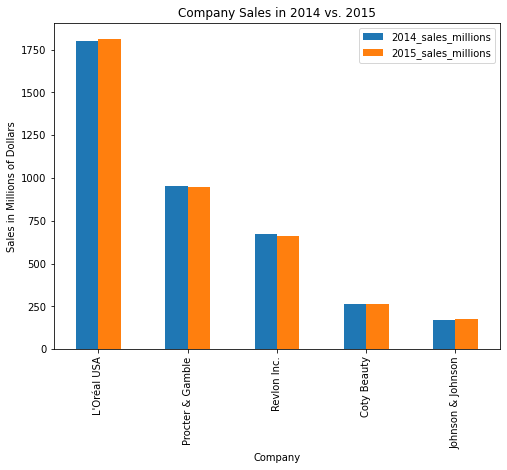

In [4]:
market_sales.plot(x = "Company", y= ['2014_sales_millions', '2015_sales_millions'], kind = 'bar', legend = True, figsize = (8, 6))
plt.ylabel("Sales in Millions of Dollars")
plt.title("Company Sales in 2014 vs. 2015")
plt.show()

We then wanted to examine the sale and share percent change by company, so we use a bar graph again. Since there are positive and negative values, we know that the graph will look a bit different.

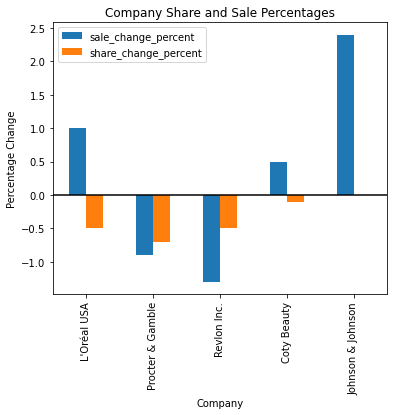

In [26]:
market_sales.plot(x = "Company", y= ['sale_change_percent', 'share_change_percent'], kind = 'bar', legend = True, figsize = (6, 5))
plt.axhline(y=0, color='black', linestyle='-')
plt.ylabel("Percentage Change")
plt.title("Company Share and Sale Percentages")
plt.show()

Here we see some interesting data. While the sale change percent grew for L'Oreal and Coty Beauty, their share percentages declined. Additionally, Johnson & Johnson sale percentage grew far more than any other company. It is also noteable that J&J's share percentage did not change at all. Another interesting observation is that while J&J had the largest sales percentage increase, their overall sales still remained the lowest in terms of millions of dollars.

## Amazon

In [2]:
# reading in pre-cleaned amazon review dataset
beauty_clean = pd.read_csv('amazonreviews_beauty.csv')

In [28]:
beauty_clean.head()

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,vine,verified_purchase,review_headline,review_body,review_date,corporation
0,44229150,RVYRD19B1ZYM7,B00PJ5ZMOA,413244867,Sally Hansen Treatment Gel Shine 3D Top Coat N...,5.0,1.0,N,N,A must try,The best top coat ever! Makes my nails shiny a...,2015-03-11,Coty
1,16159737,R1QS2P3JI6D47X,B00KLSYJGW,736313484,Maybelline New York Expert Wear Eye shadow Tri...,5.0,0.0,N,Y,Five Stars,Just what I wanted and I can't buy it here!,2015-05-18,L'oreal
2,27448091,R1A1NJ5KBINKRQ,B000NWAOHE,102547393,Neutrogena Cleansing Oil-Free Eye Makeup Remover,5.0,0.0,N,Y,I've bought 2!,This works fantastic in removing eye makeup. ...,2015-03-22,Johnson & Johnson
3,36691645,R8B99UKN512TG,B0039UTV5I,213576683,Revlon ColorStay Liquid Makeup for Combination...,5.0,0.0,N,Y,Five Stars,"Great seller, excellent product, fast delivery...",2015-06-17,Revlon
4,14965451,RGBKX7KMKFG01,B00N6M9N0C,415585559,Maybelline New York Great Lash Real Impact Was...,1.0,0.0,N,N,One Star,Worst product ever. Dont waste your money.,2015-06-27,L'oreal


### Histograms of Star Rating Distribution Overall and by Company

The first thing we wanted to do was figure out how the star ratings of beauty products on Amazon were distributed. Since this was comparing counts, we used histograms. We first decided to look at all products overall, and then how the distributions varied by our 5 main companies.

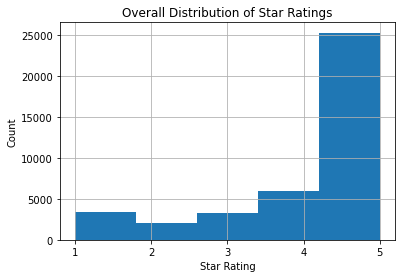

In [29]:
beauty_clean.star_rating.hist(bins = 5)
plt.xticks(range(1, 6))
plt.xlabel('Star Rating')
plt.ylabel("Count")
plt.title("Overall Distribution of Star Ratings")
plt.show()

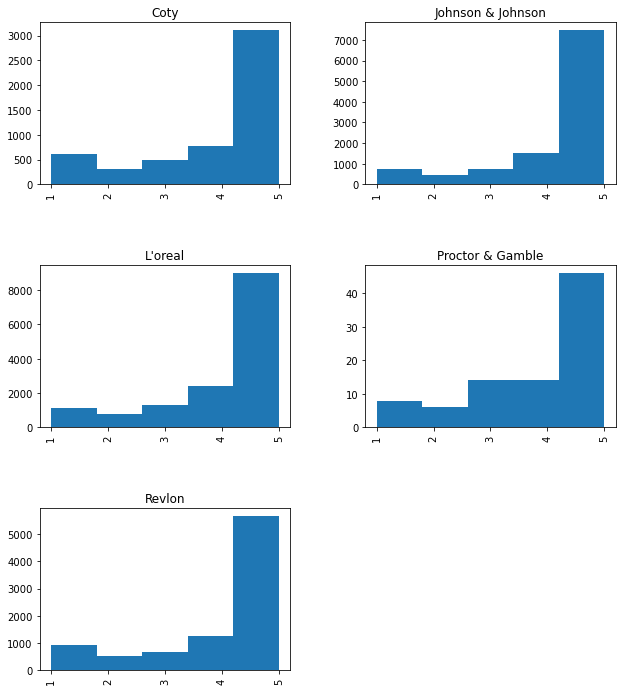

In [30]:
beauty_clean.star_rating.hist(by=beauty_clean.corporation, figsize = (10, 12), bins = 5)
plt.show()

### Basic Statistics of Star Ratings by Corporation
In addition, to further identify differences between companies, we looked at the standard statistical measurements such as standard deviation and variance.

In [32]:
beauty_clean.groupby('corporation')['star_rating'].agg([np.mean, np.median, np.std, np.var])

,mean,median,std,var
corporation,,,,
Coty,4.033680,5.0,1.394946,1.945875
Johnson & Johnson,4.328943,5.0,1.190374,1.416990
L'oreal,4.178849,5.0,1.261669,1.591809
Proctor & Gamble,3.954545,5.0,1.338288,1.791014
Revlon,4.129139,5.0,1.354828,1.835559


### Verfied Purchases and Star Ratings

The final area we are exploring is to see if verified purchases tend to receive different star ratings than non-verified purchases. We will visualize this through histograms by company.

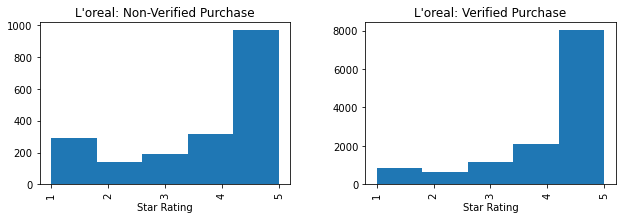

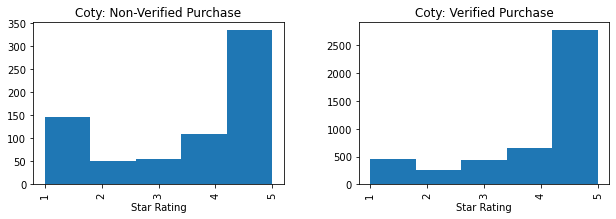

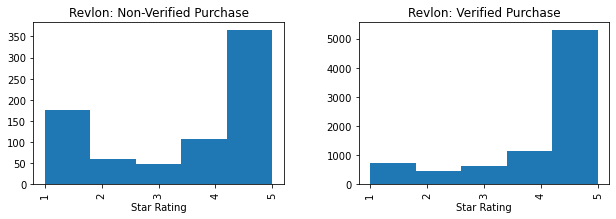

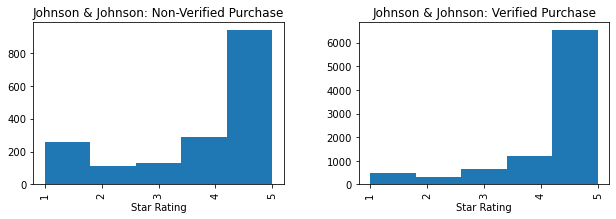

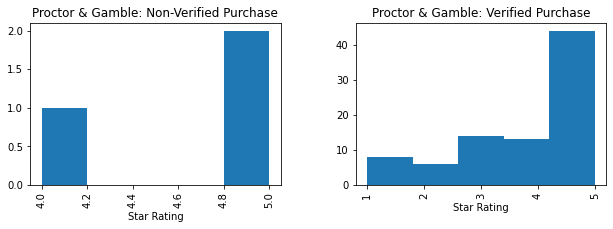

verified_purchase  corporation      
N                  Coty                 3.623209
                   Johnson & Johnson    3.890110
                   L'oreal              3.796965
                   Proctor & Gamble     4.666667
                   Revlon               3.565390
Y                  Coty                 4.096141
                   Johnson & Johnson    4.411388
                   L'oreal              4.236064
                   Proctor & Gamble     3.929412
                   Revlon               4.180730
Name: star_rating, dtype: float64

In [48]:
# histogram of star rating grouped by verified vs non-verified purchases
plot = beauty_clean[beauty_clean['corporation']=="L'oreal"]['star_rating'].hist(by=beauty_clean['verified_purchase'], 
                                                                              figsize = (10, 3), 
                                                                              bins=5)
plot[1].set_title("L'oreal: Verified Purchase")
plot[1].set_xlabel('Star Rating')
plot[0].set_title("L'oreal: Non-Verified Purchase")
plot[0].set_xlabel('Star Rating')
plt.show()

plot = beauty_clean[beauty_clean['corporation']=="Coty"]['star_rating'].hist(by=beauty_clean['verified_purchase'], 
                                                                              figsize = (10, 3), 
                                                                              bins=5)
plot[1].set_title("Coty: Verified Purchase")
plot[1].set_xlabel('Star Rating')
plot[0].set_title("Coty: Non-Verified Purchase")
plot[0].set_xlabel('Star Rating')
plt.show()

plot = beauty_clean[beauty_clean['corporation']=="Revlon"]['star_rating'].hist(by=beauty_clean['verified_purchase'], 
                                                                              figsize = (10, 3), 
                                                                              bins=5)
plot[1].set_title("Revlon: Verified Purchase")
plot[1].set_xlabel('Star Rating')
plot[0].set_title("Revlon: Non-Verified Purchase")
plot[0].set_xlabel('Star Rating')
plt.show()

plot = beauty_clean[beauty_clean['corporation']=="Johnson & Johnson"]['star_rating'].hist(by=beauty_clean['verified_purchase'], 
                                                                              figsize = (10, 3), 
                                                                              bins=5)
plot[1].set_title("Johnson & Johnson: Verified Purchase")
plot[1].set_xlabel('Star Rating')
plot[0].set_title("Johnson & Johnson: Non-Verified Purchase")
plot[0].set_xlabel('Star Rating')
plt.show()

plot = beauty_clean[beauty_clean['corporation']=="Proctor & Gamble"]['star_rating'].hist(by=beauty_clean['verified_purchase'], 
                                                                              figsize = (10, 3), 
                                                                              bins=5)
plot[1].set_title("Proctor & Gamble: Verified Purchase")
plot[1].set_xlabel('Star Rating')
plot[0].set_title("Proctor & Gamble: Non-Verified Purchase")
plot[0].set_xlabel('Star Rating')
plt.show()

# summary statistics: mean
beauty_clean.groupby(['verified_purchase','corporation'])['star_rating'].mean()

Non-verified purchases tend to have more one star ratings relative to its other ratings. The Proctor and Gamble: Non-verified purchases graph only has one observation and is an anomaly. I am not planning on using this graph/data point.

Additionally, comparing the means between verified and non-verified purchases, we can see that verified ourchases have consistently higher star_rating means. 

### Review Body Length Analysis

We then wanted to explore the distribution of review body text length. We decided the best way to do this was through histograms. Like our other graphs, we first explored how this looked across all companies altogther, and then we further broke the data down by company.

First we need to calculate how long each review is, which we are doing by counting the number of characters. We added another column for this called review_length.

In [4]:
beauty_clean['review_length'] = beauty_clean['review_body'].str.len()

In [65]:
beauty_clean.head() #now we see our new review_length column

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,vine,verified_purchase,review_headline,review_body,review_date,corporation,review_length
0,24767754,R1XFL3Z2OT99W8,B003LSZHQ0,192111987,"Revlon Beyond Natural Blush & Bronzer, Peach (...",3.0,0.0,N,Y,Three Stars,This blush and bronzer was no big deal. It's ...,2015-06-10,Revlon,72.0
1,28040275,R3AKWI2QG78Y6W,B00A9KBHR6,533375687,Exclusive By Revlon Crazy Shine Nail Buffer # ...,5.0,0.0,N,Y,These make your natural nails so shiny. The gr...,These make your natural nails so shiny. The g...,2015-08-28,Revlon,189.0
2,34986371,R1UU0O9IDQAJ90,B001DPMETG,105754500,Garnier SkinActive Clearly Brighter Anti-Puff ...,5.0,1.0,N,Y,This works well because it lets me massage awa...,This works well because it lets me massage awa...,2015-07-23,L'oreal,119.0
3,36407464,R1XQ88PJ7HPGYQ,B00113HO90,78786137,Neutrogena Rainbath Refreshing Shower and Bath...,5.0,0.0,N,Y,Neutrogena Rocks!!,Awesome products!!,2015-05-25,Johnson & Johnson,18.0
4,889672,R1YLPTSI256CM6,B004Y9H1QO,511887159,Maybelline New York Baby Lips Moisturizing Lip...,5.0,0.0,N,Y,Five Stars,ok,2015-02-07,L'oreal,2.0


Now that we have this new column, we can visualize this data through some more histograms. As we have been doing throughout, we will begin with an examination of all companies together, and then break the data down by company.

Looking at the overall review text distribution, we see that most reviews are less than 2000 characters. Let's take a look at this distribution histogram when we only consider the reviews with less than 2000 characters.

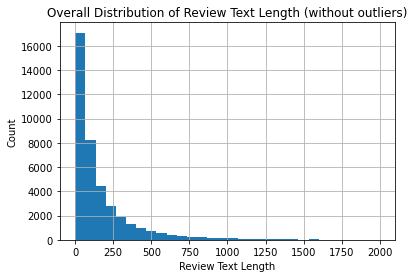

In [37]:
beauty_clean[beauty_clean['review_length'] < 2000].review_length.hist(bins=30)
plt.xlabel('Review Text Length')
plt.ylabel("Count")
plt.title("Overall Distribution of Review Text Length (without outliers)")
plt.show()

Looking at this histogram, we still see that most reviews are 250 words or less.

Now analyzing review length by distribution, we will also only look at reviews with 1000 characters or less separately.

### Histograms of Review Text Lengths of Reviews with <1000 Characters

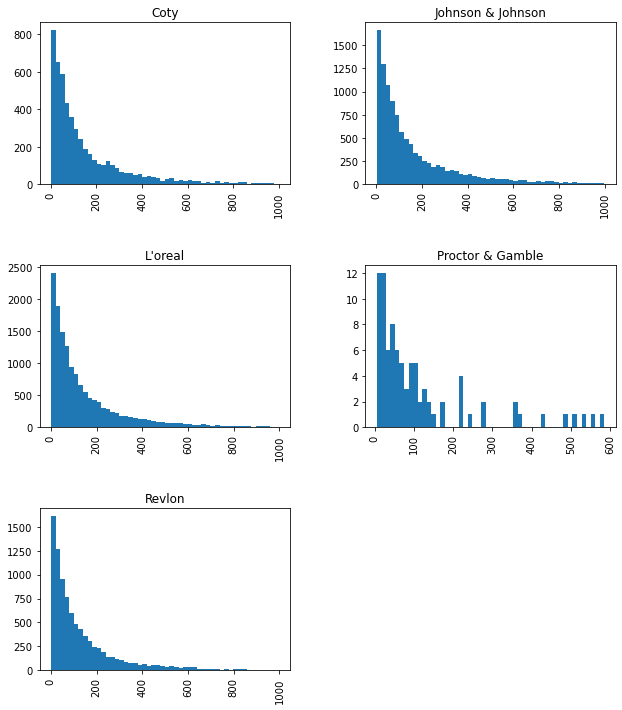

In [38]:
beauty_clean[beauty_clean['review_length'] < 1000].review_length.hist(by=beauty_clean.corporation, figsize = (10, 12), bins = 50)
plt.show()

Note that the axes tick marks are not the same between all graphs. Despite this, we see a similar shape in all these histograms.

### Examining the Correlation Between Review Length & Star Rating

Now that we've analyzed just the distribution of review text length, we also want to see how this is correlated to star ratings.

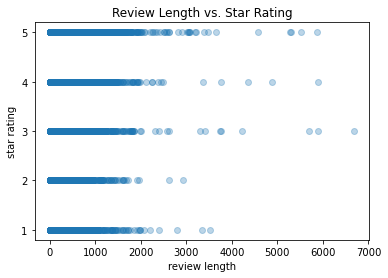

In [9]:
plt.scatter(beauty_clean['review_length'], beauty_clean['star_rating'], alpha = 0.3)
plt.yticks(range(1, 6)) #only include ticks for the whole numbers of the star ratings
plt.xlabel("review length")
plt.ylabel('star rating')
plt.title('Review Length vs. Star Rating')
plt.show()

In [40]:
beauty_clean['review_length'].corr(beauty_clean['star_rating'])

-0.09800816948613393

Clearly, most of the data is concentrated near the smaller review text length. We will do the same thing now zooming into reviews just under 3000 characters.

Based on the graph and correlation coefficient, there is virtually no correlation between review length and star ratings. This is contrary to our prediction that longer reviews might indicate extremely positive/negative ratings. 

### Analyzing Verified Purchases and Vine Reviews by Company

Another area we want to explore is how Verified Purchases and Vine Reviews might create differences from non-verified/vine reviews.

#### Percentages of Verified Purchases and Vine Reviews

First we must calculate the percentage and counts of vine/verified reviews in each corporation. We use some basic list comprehensions for this.

In [46]:
brand_reviews = [loreal_reviews, coty_reviews, revlon_reviews, jnj_reviews, png_reviews]

#calculating the percents and counts of vine reviews for each brand
vine_percent = [len(brand[brand['vine']=='Y'])/len(brand)*100 for brand in brand_reviews]
vine_counts = [len(brand[brand['vine']=='Y']) for brand in brand_reviews]

#calculating the percents and counts of verified purchase reviews for each brand
ver_percent = [len(brand[brand['verified_purchase']=='Y'])/len(brand)*100 for brand in brand_reviews]
ver_counts = [len(brand[brand['verified_purchase']=='Y']) for brand in brand_reviews]

total = [len(brand) for brand in brand_reviews]

percentile = pd.DataFrame({
    'brand':["L'oreal", 'Coty', 'Revlon', 'Johnson & Johnson', 'Proctor & Gamble'],
    'vine_percent':vine_percent,
    'vine_counts':vine_counts,
    'verified_percent':ver_percent,
    'verified_counts':ver_counts,
    'total':total
})
percentile

,brand,vine_percent,vine_counts,verified_percent,verified_counts,total
0,L'oreal,1.009137,148,86.969862,12755,14666
1,Coty,0.000000,0,86.792810,4587,5285
2,Revlon,0.443017,40,91.615904,8272,9029
3,Johnson & Johnson,1.920966,210,84.184047,9203,10932
4,Proctor & Gamble,0.000000,0,96.590909,85,88


Our biggests concern is working with Proctor & Gamble data, which only has a total of 88 observations. 

While analyzing vine reviews would have been very interesting, due to its limited observations, we are unable to perform data analysis on all the brands' vine reviews. 

# Text Analysis

After running initial summary and visual data analysis, we want to take a closer look at how the text of the reviews differ by company, star rating, and overall sentiment. We now create a `CountVectorizer` object. This is an object which will construct the term-document matrix for us. This object accepts various parameters. In this case, we've specified common English-language "stop words" to be disregarded. A stop word is a word that's considered uninteresting for the purposes of natural language processing. For example, "she," "can", and "the" are common stop words. We have also included an argument for `min_df`, where the object will ignore words that appear less than 5 times in all of the reviews. We ultimately converted this counts object into a pandas dataframe so that each word reads as a column.

In [127]:
vec=CountVectorizer(stop_words="english", min_df = 5)
counts=vec.fit_transform(beauty_clean['review_body'].dropna())
counts=counts.toarray()
counts_df=pd.DataFrame(counts, columns=vec.get_feature_names())
counts_df.head()

,00,05,10,100,101,11,110,12,120,13,...,yuck,yucky,yummy,yup,zero,zinc,zit,zits,zombie,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Above we can see what our initial dataframe looks like. Now, we will join this dataframe to our original dataframe that contained the other characteristics of the reviews.

In [128]:
word_counts = pd.concat((beauty_clean,counts_df), axis=1)

### Most Common Words

Now we want to see which words appear most out of all of the reviews. We have listed the top 30 words, and included the count of times they appear as well as the percentage.

In [129]:
all_counts = counts_df.sum(axis = 0).sort_values(ascending = False).head(30)
all_counts_df = pd.DataFrame(all_counts, columns = {'count'}).reset_index()
all_counts_df = all_counts_df.rename(columns = {'index' : 'word'})
all_counts_df['percent'] = round((all_counts_df['count']/sum(all_counts_df['count']))*100, 4)
all_counts_df.head(30)

,word,count,percent
0,product,11415,8.0326
1,love,8718,6.1347
2,great,8467,5.9581
3,skin,8453,5.9483
4,color,7622,5.3635
5,like,7414,5.2171
6,br,7270,5.1158
7,use,6954,4.8934
8,hair,6684,4.7034
9,good,6050,4.2573


Here we have curated words we would associate with bad reviews, and see how much they appear in the reviews as a percent. What we observe is that "dry" and "bad" are far more prevalent than other words, yet none of these words appear all too much in the greater scheme of all words.

In [130]:
all_values = counts_df.to_numpy().sum()
bad = ['worst', 'horrible', 'bad', 'awful', 'terrible', 'cakey', 'dry', 'allergic']
counts_df[bad].sum() / all_values * 100

worst       0.025654
horrible    0.038654
bad         0.141791
awful       0.035188
terrible    0.031721
cakey       0.027734
dry         0.540295
allergic    0.028601
dtype: float64

Next we repeated this process for words we would associate with good reviews. What we notice here is that "great" and "good" are extremely common, summing to greater than 1%, which none of our "bad" words did.

In [131]:
good = ['amazing', 'great', 'best', 'holy', 'reliable', 'good', 'favorite']
counts_df[good].sum() / all_values * 100

amazing     0.159124
great       1.467654
best        0.399198
holy        0.008667
reliable    0.006414
good        1.048696
favorite    0.236087
dtype: float64

#### Common Words by Star Rating

Next we wanted to analyze which words were most common for each level of star rating. We assumed previously that more extreme ratings would have stronger words appear. We also hypothesized that lower star ratings would have more negative words. 

In [148]:
for star in range(1, 6):
    print('star rating: ', star)
    star_reviews = word_counts.loc[word_counts['star_rating'] == star, :]
    reviews = star_reviews.iloc[:, 14:]
    reviews = reviews.drop(columns = ['product', 'br', 'really', '34', 'skin', 'color', 'hair'])
    total = reviews.to_numpy().sum()
    counts = (reviews.sum(axis = 0).sort_values(ascending = False).head(15))
    
    star_counts = pd.DataFrame(counts, columns = {'count'}).reset_index()
    star_counts = star_counts.rename(columns = {'index' : 'word'})
    star_counts['percent'] = round((star_counts['count']/sum(star_counts['count']))*100, 4)
    display(star_counts)

star rating:  1


,word,count,percent
0,like,677.0,11.4281
1,love,561.0,9.4700
2,great,534.0,9.0142
3,use,529.0,8.9298
4,good,465.0,7.8494
5,just,427.0,7.2080
6,used,415.0,7.0054
7,face,333.0,5.6212
8,don,317.0,5.3511
9,using,312.0,5.2667


star rating:  2


,word,count,percent
0,like,421.0,11.4309
1,use,355.0,9.6389
2,love,351.0,9.5303
3,great,339.0,9.2045
4,good,287.0,7.7926
5,just,259.0,7.0323
6,used,221.0,6.0005
7,don,203.0,5.5118
8,face,199.0,5.4032
9,dry,198.0,5.3761


star rating:  3


,word,count,percent
0,like,728.0,11.9207
1,good,581.0,9.5137
2,use,580.0,9.4973
3,love,575.0,9.4154
4,great,533.0,8.7277
5,just,483.0,7.9090
6,doesn,326.0,5.3381
7,used,321.0,5.2563
8,does,313.0,5.1253
9,don,299.0,4.8960


star rating:  4


,word,count,percent
0,great,1253.0,10.9874
1,like,1244.0,10.9085
2,love,1205.0,10.5665
3,use,1114.0,9.7685
4,good,1094.0,9.5931
5,just,715.0,6.2697
6,face,597.0,5.2350
7,used,572.0,5.0158
8,does,568.0,4.9807
9,dry,547.0,4.7966


star rating:  5


,word,count,percent
0,love,6026.0,13.1788
1,great,5808.0,12.7020
2,use,4376.0,9.5703
3,like,4344.0,9.5003
4,good,3623.0,7.9235
5,just,2845.0,6.2220
6,used,2369.0,5.1810
7,works,2282.0,4.9907
8,face,2157.0,4.7173
9,using,2112.0,4.6189


Our findings here were a bit surprising. It seems as if the most popular words are pretty much the same between star ratings. 

However, it is important to note that our CountVectorizer object only counts single words, so we have no way of telling if the negative reviews actually said "not great", but we simply only captured the "great."

Analyzing these counts a bit further, we can see that "love" does show up more often in 5 star reviews than any of the other star ratings, beating them by about 4%. The word "like" seems to be consistently present among all star reviews. Additionally, the word "dry" appears in the top for all star ratings except 3 star reviews. The word "dry" appears far more often in 2-star reviews, beating the other star ratings by about 1%. 

What this ultimately seems to be telling us is that individual word counts are not enough to differentiate different reviews' star ratings. We might need a more complex natural language processing object to explore these differences.

#### Common Words by Company

We next wanted to explore which words appear more frequently by company, to see if they reflected in any way their performance in the market for the year 2015.

In [147]:
for company in beauty_clean['corporation'].unique():
    
    print('Company: ', company)
    company_reviews = word_counts.loc[word_counts['corporation'] == company, :]
    reviews = company_reviews.iloc[:, 14:]
    reviews = reviews.drop(columns = ['product', 'br', 'really', '34', 'skin', 'color', 'hair'])
    total = reviews.to_numpy().sum()
    counts = (reviews.sum(axis = 0).sort_values(ascending = False).head(15))
    
    company_counts = pd.DataFrame(counts, columns = {'count'}).reset_index()
    company_counts = company_counts.rename(columns = {'index' : 'word'})
    company_counts['percent'] = round((company_counts['count']/sum(company_counts['count']))*100, 4)
    display(company_counts)

Company:  Coty


,word,count,percent
0,love,1151.0,12.1120
1,great,1098.0,11.5542
2,like,1007.0,10.5967
3,use,888.0,9.3444
4,good,773.0,8.1343
5,just,657.0,6.9136
6,polish,548.0,5.7666
7,used,505.0,5.3141
8,time,464.0,4.8827
9,works,456.0,4.7985


Company:  L'oreal


,word,count,percent
0,love,3362.0,12.7036
1,great,3115.0,11.7703
2,like,2692.0,10.1719
3,use,2526.0,9.5447
4,good,2234.0,8.4413
5,just,1739.0,6.5709
6,used,1390.0,5.2522
7,does,1223.0,4.6212
8,face,1203.0,4.5456
9,ve,1203.0,4.5456


Company:  Johnson & Johnson


,word,count,percent
0,great,2346.0,10.9976
1,love,2283.0,10.7022
2,use,2139.0,10.0272
3,like,2040.0,9.5631
4,good,1741.0,8.1614
5,face,1452.0,6.8067
6,just,1267.0,5.9394
7,using,1183.0,5.5457
8,used,1134.0,5.3160
9,dry,1095.0,5.1331


Company:  Revlon


,word,count,percent
0,love,1910.0,12.3138
1,great,1887.0,12.1656
2,like,1659.0,10.6956
3,use,1390.0,8.9614
4,good,1283.0,8.2715
5,just,1056.0,6.8081
6,used,860.0,5.5445
7,works,750.0,4.8353
8,does,748.0,4.8224
9,time,690.0,4.4485


Company:  Proctor & Gamble


,word,count,percent
0,great,21.0,12.9630
1,good,19.0,11.7284
2,like,16.0,9.8765
3,love,12.0,7.4074
4,use,11.0,6.7901
5,nice,11.0,6.7901
6,time,11.0,6.7901
7,just,10.0,6.1728
8,used,9.0,5.5556
9,didn,8.0,4.9383


What we see here is that words are again pretty similar among companies. This means that generally, these reviews do not represent a company's performance in the market.

One observation is that "love" appears far less in Proctor & Gamble reviews than other companies, with the word appearing only in 7% of reviews as opposed to 10-12%. One could say this has a correlation to the fact that Proctor & Gamble was one of the 2 companies that had both share and sale percentage drops over the year, and had the greatest share percent change in the negative direction. 

Another observation is that the word "dry" only appears in the top appearing words for Johnson & Johnson. J&J's market performance was unique in the sense that it had no change in share percent, but had massive sale growth in the year. Despite that, it still had the lowest sales in millions compared to all the other companies. 

Other than these two observations, it seems that the most popular words in reviews are consistent between companies despite their performance in the overall market.

### Sentiment Model

Based off of these word counts, we next wanted to see if we would be able to create a model that could predict whether a review was positive or negative.

Due to the large volume of words in our CountVectorizer, we decided to use only the top 500 words that were most common among all the reviews.

In [134]:
column_sums = (counts_df.sum(axis = 0).sort_values(ascending = False))[:500]
col_list = list(column_sums.index)
top_words = counts_df.loc[:, col_list]

In [135]:
model_data = pd.concat((beauty_clean, top_words), axis=1).dropna()

Next we created a column in our data that classified a review as positive or not positive. We decided that a positive review would be either 4 or 5 stars. We thought that 3-star reviews were too irrelevant to be used in this model.

In [136]:
model_data['is_positive'] = model_data['star_rating'] > 3

In order to create a stronger model, we split our data into training and testing data. Our predictor columns are all of the words from our count vectorizer. 

In [137]:

train,test = train_test_split(model_data.dropna(), test_size=.3)

original_cols = list(model_data.columns)[:13]
original_cols.append('is_positive')

X_train = train.drop(original_cols, axis = 1)
y_train=train['is_positive']

X_test = test.drop(original_cols, axis = 1)
y_test =test['is_positive']

Next we used a logistic regression model to fit the data and create the model.

In [138]:
LR = LogisticRegression().fit(X_train, y_train)

In [139]:
cross_val_score(LR, X_train, y_train, cv=5).mean()

0.7778174674048938

In [140]:
LR.score(X_test, y_test)

0.7754625770961827

Above we see that after cross validation, the model performs with about 78% accuracy on our training *and* testing data. While this is not bad, it is not super accurate.

In [141]:
print('Baseline accuracy:', round(model_data.is_positive.sum()/len(model_data),3))

Baseline accuracy: 0.78


Additionally, we see that our baseline accuracy is essentially the same as our model accuracy. This means that if we guessed a review was positive every time, then we would be right just as much as if we used our logistic regression model. This leads us to believe that our model could be improved and consider other factors to better classify positive vs. negative reviews.

#### Words with Strongest Sentiment

Our logistic regression model gives us a coefficient for each word, where positive words have higher coefficients and negative words have negative coefficients. We finally wanted to examine which words were associated more with the positive/negative reviews.

In [142]:
sentiment_df = pd.DataFrame({'word': X_train.columns, 'coef':LR.coef_[0]})
sentiment_df

,word,coef
0,product,0.012079
1,love,0.279542
2,great,0.342493
3,skin,0.056647
4,color,0.005541
...,...,...
495,age,-0.043372
496,similar,0.251530
497,version,-0.428953
498,consistency,-0.272594


##### Negative Words

In [143]:
print('most negatively associated words:')
sentiment_df.sort_values('coef', ascending=True).head(20)

most negatively associated words:


,word,coef
195,disappointed,-0.623281
207,ok,-0.590007
346,okay,-0.573309
281,dried,-0.569644
484,broken,-0.567694
446,hate,-0.491040
497,version,-0.428953
140,ll,-0.408667
180,received,-0.380530
465,package,-0.353667


##### Positive Words

In [144]:
print('most positively associated words:')
sentiment_df.sort_values('coef', ascending=False).head(20)

most positively associated words:


,word,coef
219,wonderful,0.601454
418,described,0.571709
378,cool,0.541899
367,finally,0.502946
456,eczema,0.497411
457,live,0.489697
435,fantastic,0.481183
306,says,0.461831
436,baby,0.428553
169,beautiful,0.417410


Based off of these top words, it is unsurprising which words have the strongest positive and negative sentiment. For the negative words, "disappointed," "dried," "broken,""hate," and "waste" all seem like common reactions for unhappy customers. On the flip side, "wonderful," "fantastic," "beauitful," "excellent," etc. seem reasonable for a satisfied customer. The strongest coefficents for both positive and negative have an absolute value of around 0.60, which is not that strong, but still enough to make a difference. 

# Multinomial Regression
Moving on from text analysis, we will be performing logistic multinomial regression using inputs such a verification status, star reviews, review length, helpful votes to predict the corporation being reviewed.

First, I will be converting the beauty_clean dataset to binary values. This way, we will be able to use `LogisticRegression()` on the data.

In [5]:
col = ['star_rating','helpful_votes','vine','verified_purchase','review_length','corporation']
beauty_binary = beauty_clean[col]

In [6]:
# changing review length to binary
mn = beauty_clean['review_length'].mean()
beauty_binary['review_length'] = beauty_clean['review_length'].apply(lambda x: 1 if x >= mn else 0)

# changing vine reviews to 0 and 1
beauty_binary['vine'] = beauty_binary['vine'].map({'Y': 1, 'N': 0})

# verified purchases
beauty_binary['verified_purchase'] = beauty_binary['verified_purchase'].map({'Y': 1, 'N': 0})

# changing helpful votes to 0 for no helpful votes and 1 for helpful votes
beauty_binary['helpful_votes'] = beauty_clean['helpful_votes'].apply(lambda x: 1 if x > 0 else 0)

<ipython-input-6-0d5a0d160fb7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beauty_binary['review_length'] = beauty_clean['review_length'].apply(lambda x: 1 if x >= mn else 0)
<ipython-input-6-0d5a0d160fb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beauty_binary['vine'] = beauty_binary['vine'].map({'Y': 1, 'N': 0})
<ipython-input-6-0d5a0d160fb7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [7]:
# star rating to binary
beauty_binary = pd.get_dummies(beauty_binary, columns=['star_rating'])

Here, we are saving the column names that will become inputs for the `LogisticRegression()` model.

In [8]:
# columns to use for prediction
predictors = list(beauty_binary.columns)
predictors.remove('corporation')

Below, we are mapping the corporation names to their corresponding numbers so that the model can process this.

In [9]:
# corporation from 0-4
corporation_map = {"Coty": 0, 
             "Johnson & Johnson": 1, 
             "L'oreal": 2, 
             "Proctor & Gamble": 3, 
             "Revlon": 4}
beauty_binary['corporation'] = beauty_binary['corporation'].map(corporation_map)

In [10]:
beauty_binary

,helpful_votes,vine,verified_purchase,review_length,corporation,star_rating_1.0,star_rating_2.0,star_rating_3.0,star_rating_4.0,star_rating_5.0
0,0,0,1,0,4,0,0,1,0,0
1,0,0,1,1,4,0,0,0,0,1
2,1,0,1,0,2,0,0,0,0,1
3,0,0,1,0,1,0,0,0,0,1
4,0,0,1,0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
39995,0,0,1,0,2,0,0,0,0,1
39996,0,0,1,0,2,0,0,0,0,1
39997,0,0,1,0,1,0,0,0,0,1
39998,1,0,1,1,2,0,0,0,1,0


In [11]:
corporation_model = LogisticRegression(multi_class='ovr')
corporation_model.fit(beauty_binary[predictors], beauty_binary['corporation']) 

# figure out multinomial regression, what do i do from here?

LogisticRegression(multi_class='ovr')

I fitted the multinomial regression model to beauty_binary. I used One vs Rest (OvR) logistic regression, which splits the corporations into multiple binary variables. The `predictors` are all the input columns except for `corporation`, which is then used as the y-value.

In [16]:
# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(beauty_binary[predictors], 
                                                    beauty_binary['corporation'], 
                                                    test_size=0.25)

log_model = LogisticRegression(multi_class='ovr').fit(X_train, y_train)
log_predict = log_model.predict(X_test)

I split the data into training and testing data. Then I fitted the multinomial logistic regression to the x_train and y_train.

In [21]:
print(classification_report(y_test, log_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1335
           1       0.41      0.07      0.13      2726
           2       0.37      0.96      0.53      3632
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00      2285

    accuracy                           0.37     10000
   macro avg       0.15      0.21      0.13     10000
weighted avg       0.24      0.37      0.23     10000



/Users/michellehui/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michellehui/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michellehui/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


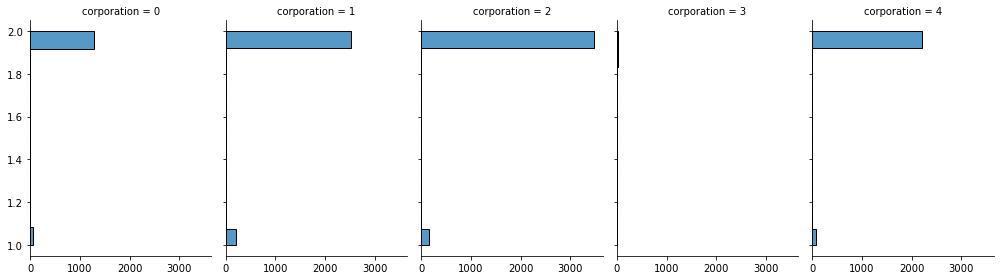

In [22]:
sampled_test = pd.DataFrame({'corporation': y_test, 'predict':log_predict})
fg = sns.FacetGrid(sampled_test, col='corporation', height=4, aspect=0.7)
fg.map_dataframe(sns.histplot, y='predict')

Above, is the classification report and horizontal histogram for our prediction model. We see that the precision and accuracy is extremely low. Precision and F1 scores for 3 out of the 5 corporations are zero. While we can see the model is predicting every review to belong to 2, which is the center value. 

This means the variables between the corporations are too similar and not discernible enough for the model to predict.

# Comparing Star Rating Distribution Shapes
Shifting away from multinomial regression, we are applying the Kolmogorov-Smirnov test to compare different distributions of companies and verified purchases against each other. The two-sample test compares two distributions against each other to see if the distributions are similar. A low p-value indicates that the two samples are drawn from different distributions.

In [26]:
beauty_clean = pd.read_csv('amazonreviews_beauty.csv')

### Comparing Star Rating Distribution Between Conglomerates
First, we will be using the KStest to compare two brands against each other to see if they have similar star rating distributions.

In [4]:
brands = ["L'oreal", 'Coty', 'Revlon', 'Johnson & Johnson','Proctor & Gamble']
kstest_pvalue = pd.DataFrame(columns=["L'oreal", 'Coty', 'Revlon', 'Johnson & Johnson', 'Proctor & Gamble','corporation'])

# computing KS test p-value
kstest_pvalue = kstest_pvalue.append({
                            brands[0]:sp.stats.kstest(beauty_clean['star_rating'], 
                                                         beauty_clean[beauty_clean['corporation']==brands[0]]['star_rating'])[1],
                            brands[1]:sp.stats.kstest(beauty_clean['star_rating'], 
                                                 beauty_clean[beauty_clean['corporation']==brands[1]]['star_rating'])[1],
                            brands[2]:sp.stats.kstest(beauty_clean['star_rating'], 
                                                beauty_clean[beauty_clean['corporation']==brands[2]]['star_rating'])[1],
                            brands[3]:sp.stats.kstest(beauty_clean['star_rating'], 
                                                beauty_clean[beauty_clean['corporation']==brands[3]]['star_rating'])[1],
                            brands[4]:sp.stats.kstest(beauty_clean['star_rating'], 
                                                beauty_clean[beauty_clean['corporation']==brands[4]]['star_rating'])[1],

                            'corporation': 'Overall'},
                            ignore_index = True)

In the cell above, I compared each brand against the overall distrbution using a for loop.

In [ ]:
for brand in brands:
    kstest_pvalue = kstest_pvalue.append({
                            brands[0]:sp.stats.kstest(beauty_clean[beauty_clean['corporation']==brand]['star_rating'], 
                                                         beauty_clean[beauty_clean['corporation']==brands[0]]['star_rating'])[1],
                            brands[1]:sp.stats.kstest(beauty_clean[beauty_clean['corporation']==brand]['star_rating'], 
                                                 beauty_clean[beauty_clean['corporation']==brands[1]]['star_rating'])[1],
                            brands[2]:sp.stats.kstest(beauty_clean[beauty_clean['corporation']==brand]['star_rating'], 
                                                beauty_clean[beauty_clean['corporation']==brands[2]]['star_rating'])[1],
                            brands[3]:sp.stats.kstest(beauty_clean[beauty_clean['corporation']==brand]['star_rating'], 
                                                beauty_clean[beauty_clean['corporation']==brands[3]]['star_rating'])[1],
                            brands[4]:sp.stats.kstest(beauty_clean[beauty_clean['corporation']==brand]['star_rating'], 
                                                beauty_clean[beauty_clean['corporation']==brands[4]]['star_rating'])[1],
                            'corporation': brand},
                            ignore_index = True)  


In the cell above, I compared each brand against other brands using another for loop to produce the KStest p-values.

In [ ]:
kstest_pvalue = kstest_pvalue.set_index('corporation')

,L'oreal,Coty,Revlon,Johnson & Johnson,Proctor & Gamble
corporation,,,,,
Overall,2.389256e-03,1.996499e-07,2.489627e-03,4.172724e-20,0.845286
L'oreal,1.000000e+00,8.145916e-05,2.625683e-03,2.157187e-26,0.991217
Coty,8.145916e-05,1.000000e+00,3.383141e-02,6.168237e-24,0.996803
Revlon,2.625683e-03,3.383141e-02,1.000000e+00,1.075449e-17,0.969655
Johnson & Johnson,2.157187e-26,6.168237e-24,1.075449e-17,1.000000e+00,0.165232
Proctor & Gamble,9.912174e-01,9.968026e-01,9.696550e-01,1.652320e-01,1.000000


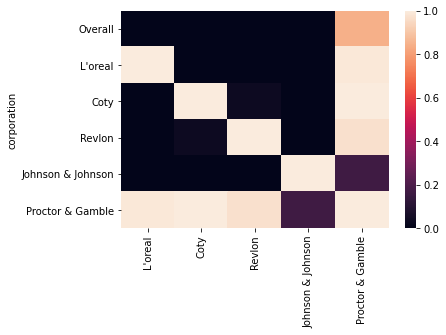

In [12]:
sns.heatmap(kstest_pvalue, vmin=0, vmax=1)
kstest_pvalue

The graph and dataframe above represents the respective p-values when each brand is compared against another. 

Surpisingly, the p-values of indivudal corporations compared against the overall star rating distribution are almost all less than 0.01. The individual corporations compared against  other corporations are also almost all very close to zero. The only exception is Proctor & Gamble, which has p-values close to 1. We hypothesize this is because Proctor & Gamble has a significantly smaller sample size compared the rest.

The low p-values mean we are able to confidently reject the null hypothesis that the star rating distributions of each company are drawn from the same distribution for all the companies except Procotr & Gamble.

We hypothesize the p-value is so low because of the large dataset we have. Any minute differences in the graphs would greatly influence the KStest. 

#### KStest on Subset of Data 
To verify the above hypothesis, we are going to subset the data and run the KStest on the smaller star rating distributions again. If this is the case, the p-values should be significantly higher.

In [14]:
# subset of data as sanity check
beauty_sample = beauty_clean.sample(1000)

brands = ["L'oreal", 'Coty', 'Revlon', 'Johnson & Johnson','Proctor & Gamble']
kstest_sample_pvalue = pd.DataFrame(columns=["L'oreal", 'Coty', 'Revlon', 'Johnson & Johnson', 'Proctor & Gamble','corporation'])

# computing KS test p-value
kstest_sample_pvalue = kstest_sample_pvalue.append({
                            brands[0]:sp.stats.kstest(beauty_sample['star_rating'], 
                                                         beauty_sample[beauty_sample['corporation']==brands[0]]['star_rating'])[1],
                            brands[1]:sp.stats.kstest(beauty_sample['star_rating'], 
                                                 beauty_sample[beauty_sample['corporation']==brands[1]]['star_rating'])[1],
                            brands[2]:sp.stats.kstest(beauty_sample['star_rating'], 
                                                beauty_sample[beauty_sample['corporation']==brands[2]]['star_rating'])[1],
                            brands[3]:sp.stats.kstest(beauty_sample['star_rating'], 
                                                beauty_sample[beauty_sample['corporation']==brands[3]]['star_rating'])[1],
                            brands[4]:sp.stats.kstest(beauty_sample['star_rating'], 
                                                beauty_sample[beauty_sample['corporation']==brands[4]]['star_rating'])[1],
                            'corporation': 'Overall'},
                            ignore_index = True)
for brand in brands:
    kstest_sample_pvalue = kstest_sample_pvalue.append({
                            brands[0]:sp.stats.kstest(beauty_sample[beauty_sample['corporation']==brand]['star_rating'], 
                                                         beauty_sample[beauty_sample['corporation']==brands[0]]['star_rating'])[1],
                            brands[1]:sp.stats.kstest(beauty_sample[beauty_sample['corporation']==brand]['star_rating'], 
                                                 beauty_sample[beauty_sample['corporation']==brands[1]]['star_rating'])[1],
                            brands[2]:sp.stats.kstest(beauty_sample[beauty_sample['corporation']==brand]['star_rating'], 
                                                beauty_sample[beauty_sample['corporation']==brands[2]]['star_rating'])[1],
                            brands[3]:sp.stats.kstest(beauty_sample[beauty_sample['corporation']==brand]['star_rating'], 
                                                beauty_sample[beauty_sample['corporation']==brands[3]]['star_rating'])[1],
                            brands[4]:sp.stats.kstest(beauty_sample[beauty_sample['corporation']==brand]['star_rating'], 
                                                beauty_sample[beauty_sample['corporation']==brands[4]]['star_rating'])[1],

                            'corporation': brand},
                            ignore_index = True)   

I performed the exact same KStest comparing brands against the overall distritbution and other brands (same as above) on the smaller, subsetted dataset.

In [15]:
kstest_sample_pvalue = kstest_sample_pvalue.set_index('corporation')

,L'oreal,Coty,Revlon,Johnson & Johnson,Proctor & Gamble
corporation,,,,,
Overall,0.482902,0.999925,0.999519,0.073958,0.880421
L'oreal,1.000000,1.000000,0.866467,0.004564,0.969608
Coty,1.000000,1.000000,0.999996,0.197630,0.953227
Revlon,0.866467,0.999996,1.000000,0.300026,0.884665
Johnson & Johnson,0.004564,0.197630,0.300026,1.000000,0.631216
Proctor & Gamble,0.969608,0.953227,0.884665,0.631216,1.000000


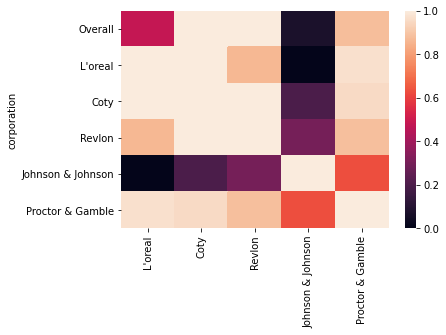

In [16]:
sns.heatmap(kstest_sample_pvalue, vmin=0, vmax=1)
kstest_sample_pvalue

When we subset the sample size to n=1000, we can see this set of p-values are significantly larger. This verifies that the kstest p-values from the full review samples are low due to the law of large numbers and not other peculiarities in the data. 

However, this is still promising as the law of large numbers suggests that any minute differences in summary statistics between corporations are significant. We will be exploring this idea further in the evaluation of significance.

### Comparying Between Verified and Non-verified reviews
As mentioned above, Proctor and Gamble was removed because it only has a few five-star reviews and analysis on it would not be very information nor accurate.

Below, I will be performing the KStest comparing the distributions between Verified and Non-Verified reviews.

In [21]:
brands = ["L'oreal", 'Coty', 'Revlon', 'Johnson & Johnson']
kstest_verified = pd.DataFrame(columns=['pvalue','company', 'verified_mean', 'nonverified_mean'])
verified = beauty_clean[beauty_clean['verified_purchase']=='Y']
non_verified = beauty_clean[beauty_clean['verified_purchase']=='N']

# computing overall statistics 
kstest_verified = kstest_verified.append({
                        'pvalue':sp.stats.kstest(verified['star_rating'], non_verified['star_rating'])[1],
                        'company': 'Overall',
                        'verified_mean': verified[verified['corporation']!='Proctor & Gamble']['star_rating'].mean(),
                        'nonverified_mean': non_verified[non_verified['corporation']!='Proctor & Gamble']['star_rating'].mean()}, 
                        ignore_index=True)

Above, I compared the overall distributions verified and non-verified star ratings against each other using the KStest to produce their respective pvalues. I also added in relevant statistics such as the means.

In [ ]:
# computing company specific statistics 
for brand in brands:
    kstest_verified = kstest_verified.append({
                            'pvalue':sp.stats.kstest(verified[verified['corporation']==brand]['star_rating'], 
                                                         non_verified[non_verified['corporation']==brand]['star_rating'])[1],
                            'company': brand,
                            'verified_mean': verified[verified['corporation']==brand]['star_rating'].mean(),
                            'nonverified_mean': non_verified[non_verified['corporation']==brand]['star_rating'].mean()},
                            ignore_index = True)


Here, I am creating a dataframe that has all the relevant statistics and p-values grouped by corporation. I computed the KStest p-values between verified and on-verified star ratings and also their respective means.

In [22]:
kstest_verified = kstest_verified.set_index('company')

In [23]:
kstest_verified

,pvalue,verified_mean,nonverified_mean
company,,,
Overall,1.013610e-89,4.252436,3.727130
L'oreal,2.124088e-36,4.239289,3.722594
Coty,2.422721e-09,4.113121,3.636232
Revlon,3.299000e-18,4.171561,3.534759
Johnson & Johnson,3.747976e-39,4.410839,3.852088


 As the p-values are close to zero, we can reject the null hypothesis that the non-verified and verified star ratings are drawn from the same distributions. As seen in the dataframe above,  the nonverified purchases are averaging consistently lower across all brands. In the distributions of star ratings, we all see they have relatively (percentage wise) more one star reviews. This is an interesting and unexpected pattern. It would be interesting to investigate the confidence intervals which we will perform in evaluation of significance. It would also be interesting to explore and understanding this pattern.                

# Evaluation of Significance

## Text Analysis Evaluation
To evaluate the significance of our model, we lastly ran a permutation to estimate the probability of getting a slope more extreme than the one our model predicted. We ran 200 permutations in this case. Since each word had its own coefficient/slope, and there were 500 words, we decided to say the overall slope was more extreme if more than half of the permuted slopes were more extreme than the originals. 

In [149]:
def permute(input_array):
    # shuffle is inplace, so copy to preserve input
    permuted = input_array.copy().values #convert to numpy array, avoiding warning
    np.random.shuffle(permuted)
    return pd.Series(permuted) # convert back to pandas

In [150]:
observed_slopes = LR.coef_

In [151]:
model = LogisticRegression().fit(model_data.drop(original_cols, axis = 1), model_data['is_positive'])
steeper_slopes = 0
n_permutations = 200

for i in range(n_permutations):
    permuted_model = LogisticRegression().fit(model_data.drop(original_cols, axis = 1), permute(model_data['is_positive']))
    
    permuted_slopes = permuted_model.coef_
    
    if sum(np.abs(permuted_model.coef_[0]) > np.abs(observed_slopes[0])) > 250:
        steeper_slopes += 1
        
print('Number of permuted slopes of greater magnitude than original linear regression slope:', steeper_slopes)
print('Implied p (slope):', steeper_slopes / n_permutations)

Number of permuted slopes of greater magnitude than original linear regression slope: 0
Implied p (slope): 0.0


After running these permutations, we see that none of the permuted slopes had more than half more extreme than the slopes of our original models. This means that there is definitely a relationship between how often specific words appear in reviews and if they are constituted as positive/negative.

## KStest Star Rating Confidence Intervals Evaluation
We will be bootstrapping the star ratings by corporation and verified purchases to determine a 95% confidence interval for their mean star ratings. We expect to find very small confidence intervals as our sample size is so large. Therefore, we can be confident even slight differences in our means are not due to variation in the samples and are statistically significant. First we will be analyzing corporations and then analyzing verified vs non-verified star ratings.

### Star Rating by Corporation Confidence Intervals
By bootstrapping for confidence intervals, we are looking to determine which corporations have definitively higher star ratings than others. 

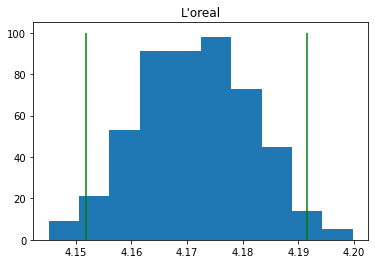

L'oreal bootstraped 95% Confidence Interval: 4.152, 4.192


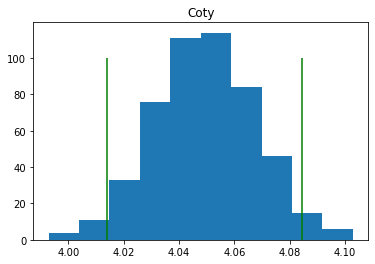

Coty bootstraped 95% Confidence Interval: 4.014, 4.085


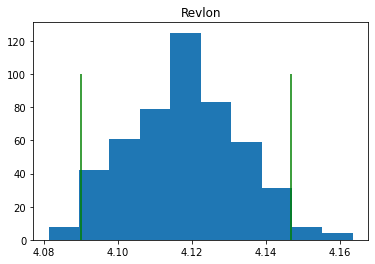

Revlon bootstraped 95% Confidence Interval: 4.090, 4.147


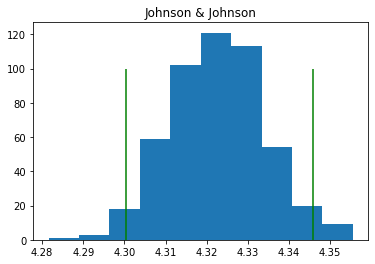

Johnson & Johnson bootstraped 95% Confidence Interval: 4.300, 4.346


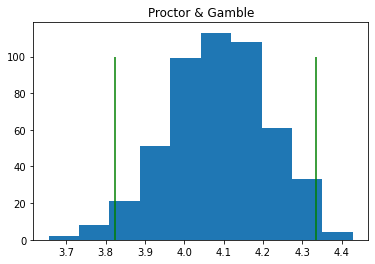

Proctor & Gamble bootstraped 95% Confidence Interval: 3.824, 4.335


In [34]:
# bootstrapping for mean star rating by corporation
brands = ["L'oreal", 'Coty', 'Revlon', 'Johnson & Johnson', 'Proctor & Gamble']
CI = pd.DataFrame()

for brand in brands:
    bootstrap_means = []
    for i in range(500):
        resampled_data = beauty_clean.sample(n=len(beauty_clean), replace=True)
        mean = resampled_data[resampled_data['corporation']==brand]['star_rating'].mean()
        bootstrap_means.append(mean)
    
    plt.hist(bootstrap_means)
    plt.title(brand)
    plt.vlines(np.quantile(bootstrap_means, q=[0.025])[0], color='green', ymin=0, ymax=100)
    plt.vlines(np.quantile(bootstrap_means, q=[0.975])[0], color='green', ymin=0, ymax=100)
    plt.show()
    
    CI_95 = np.quantile(bootstrap_means, q=[0.025, 0.975])
    CI = CI.append({'0.025':CI_95[0],'0.975':CI_95[1],'corporation': brand}, ignore_index = True)
    print('{} bootstraped 95% Confidence Interval: {:.3f}, {:.3f}'.format(brand, CI_95[0], CI_95[1]))

Here we have calculated the confidence intervals of mean star rating for each company. We also represented the calculations through a histogram and 95% confidence interval lines. 

In [40]:
CI_compile = CI.copy()
CI_compile = CI_compile.set_index('corporation')
CI_compile['mean'] = beauty_clean.groupby(by=['corporation'])['star_rating'].mean()
CI_compile['count'] = beauty_clean.groupby(by=['corporation'])['star_rating'].count()
CI_compile

,0.025,0.975,mean,count
corporation,,,,
L'oreal,4.151768,4.191530,4.170827,14664
Coty,4.014075,4.084506,4.050777,5278
Revlon,4.090187,4.146941,4.118370,8955
Johnson & Johnson,4.300377,4.345952,4.323308,11005
Proctor & Gamble,3.823869,4.334882,4.071429,98


Text(0.5, 1.0, 'Confidence Interval of Star Ratings by Corporation')

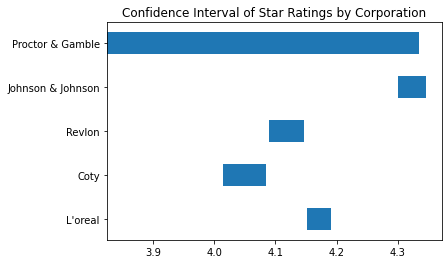

In [53]:
plt.barh(CI_compile.index.values.tolist(), width=(CI_compile['0.975']-CI_compile['0.025']), left=CI_compile['0.025'], height=0.5)
plt.title('Confidence Interval of Star Ratings by Corporation')

Above is another visualization directly comparing the confidence intervals against each other. We can see that most of the confidence intervals do not overlap.

While the differences in mean star ratings between the corporations from our initial summary statistics are small, we can see they are statistically significant. Based on star rating means, here are the company ranks:
1. Johnson & Johnson
2. L'oreal
3. Revlon
4. Coty

We are unable to include Proctor & Gamble in the rankings as the sample size is too small to narrow down on an accurate mean star rating.

### Verified vs Non-Verified Star Rating Confidence Intervals
Next, we will be bootstrapping the star ratings based off of the verification status of the review 500 times to see if there are statistically significant trends between the two categories.

In [55]:
# bootstrapping for mean star rating by verified vs non-verified
verified_status = ['Y','N']
CI = pd.DataFrame()

for status in verified_status:
    bootstrap_means = []
    for i in range(500):
        resampled_raw = beauty_clean.sample(n=len(beauty_clean), replace=True)
        resampled = resampled_raw[resampled_raw['verified_purchase']==status]
        mean = resampled['star_rating'].mean()
        bootstrap_means.append(mean)
        
    CI_95 = np.quantile(bootstrap_means, q=[0.025, 0.975])
    CI = CI.append({'0.025':CI_95[0],'0.975':CI_95[1],'Verified': status},
                   ignore_index = True)
    print('{} Star Ratings bootstraped 95% Confidence Interval ({:.5f}, {:.5f})\n'.format(
        status, CI_95[0], CI_95[1]))

Y Star Ratings bootstraped 95% Confidence Interval (4.23841, 4.26469)

N Star Ratings bootstraped 95% Confidence Interval (3.68646, 3.77064)



In [56]:
CI_compile = CI.copy()
CI_compile = CI_compile.set_index('Verified')
CI_compile['mean'] = beauty_clean.groupby(by='verified_purchase')['star_rating'].mean()
CI_compile['count'] = beauty_clean.groupby(by=['verified_purchase'])['star_rating'].count()
CI_compile

,0.025,0.975,mean,count
Verified,,,,
Y,4.238408,4.26469,4.251884,34893
N,3.686462,3.77064,3.727629,5107


Above are a few relevant statistics for each verification category including confidence intervals, mean, and sample size.

Text(0.5, 1.0, 'Confidence Interval of Star Ratings by Verification Status')

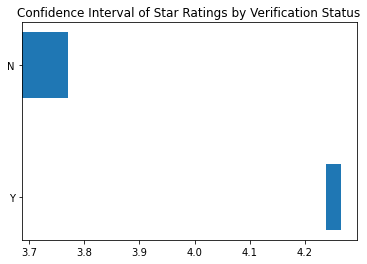

In [57]:
plt.barh(CI_compile.index.values.tolist(), width=(CI_compile['0.975']-CI_compile['0.025']), left=CI_compile['0.025'], height=0.5)
plt.title('Confidence Interval of Star Ratings by Verification Status')

We can see from the confidence intervals that the mean for verified star ratings are definitively higher than non-verified star ratings. This is a very interesting pattern that could lead to understanding consumer behavior and fake reviews. We speculate this is lower rating from non-verified purchases could be due to trolls on the internet who like to post negative reviews in their free time. However, we cannot provide further analysis with our current dataset as it would require user data and more complex natural language processing. In addition, providing an explanation might also require a deeper understanding of psychology and behavorial analysis.

# Interpretations and Conclusions

Having run these three analyses, there are some noticeable observations that we describe below. 

## Sentiment Analysis
In our sentiment analysis, we ultimately discovered little differences between reviews for different companies and star ratings. 

A possible indicator of market performance that we discovered in our analysis is that "love" appears far less in Procter & Gamble reviews than other companies, possibly reflecting the fact that Procter & Gamble was one of the 2 companies that had both share and sale percentage drops over the year, and had the greatest share percent change in the negative direction. Another observation is that the word "dry" is only a top appearing word for Johnson & Johnson. J&J's market performance was unique in the sense that it had no change in share percent, but had massive sales growth in the year. Despite that, it still had the lowest sales in millions compared to all the other companies. 

In terms of difference in words/sentiment across star ratings, it also seemed that the most common words were the same regardless of whether the review was 1 star or 5 stars. This defied our hypothesis that lower star reviews would have more negatively associated words. However, a major hindrance to our analysis was the fact that our CountVectorizer object tokenized words individually, rather than in phrases, meaning there was no way to differentiate between a reviewer who said they “don’t love” versus “love” a product. This might have caused a considerable bias in our results.

When we created a Logistic Regression model to use these counts of words to predict whether a review was positive or negative, we saw that it ran with about 78% accuracy. While this is not a horrible model, it was equal to our baseline accuracy. This meant that guessing a review was positive every time was just as effective as analyzing the words in the text. This is most likely due to the fact that most of the reviews in our dataset were positive ones. That meant that guessing positive was going to be correct most of the time since few people contributed negative reviews. However, the lack of overall negative reviews also made it harder for the model to identify common words in negative reviews, which is probably why our model accuracy could only get as high as 78%. 

Despite these somewhat unpromising results, running 200 permutations of our data revealed something else. Each word (of the top 500 that we identified) had its own coefficient to how strongly it is associated with positive reviews. We wanted to see how many of these permutations had at least half (250) of its coefficients with a steeper slope than our original model. After running these permutations, we found that none of them had more than half of their slopes more extreme than our original model. This seems to suggest that our model represents a strong relationship between variables. 

Ultimately, due to the high volume of positive reviews and basic language testing, we were not able to draw any strong or definitive conclusions about how a review body might reflect specific sentiments towards a beauty company. 
In the context of the real world, this demonstrates the fact that while Amazon itself is one of the greatest online retailers, its reviews are not necessarily that meaningful. People cannot necessarily rely on reviews to understand if they should support a company or buy a certain product, and on the flip side, companies cannot examine reviews alone to gauge the popularity of products or their performance. This is a bit disheartening, considering how many customers rely strongly on reviews to buy a product, especially on Amazon where they cannot test the product on themselves or see it before their purchase. 

## Multinomial Regression
In our One vs Rest multinomial regression, we were not able to accurately predict corporations based on review attributes. 

The precision and F1 score for 3 out of the 5 corporations were zero. From the histograms, we can see that the model was predicting almost every review to belong to corporation 2 on a scale of (0-4), which is the middle value. The model was most likely unable to discern the corporations apart based on star_review, verification status, vine reviews, etc. attributes because they are all fairly uniform across corporations. Therefore, it predicted all the reviews to belong to the middle corporation. 

This further supports the idea that we cannot aggregate reviews reviewing individual products to represent a larger corporation. Perhaps if we were to do multinomial regression again, it would be more effective on different products with more distinct attributes. 


## Kolmogorov-Smirnov Test
### Comparing Corporations
In our Kolmogorov-Smirnov test, we were able to determine that these star rating distributions between each company are not drawn from the same sample. Comparing each company against the overall distribution and other companies, our p-value is almost zero. This means we are able to reject the null hypothesis, which is that the star rating distribution for each company is the same as the overall distribution and other companies distributions. 

We were very surprised by this result as the initial visualizations do not show significant differences in the shape of the distribution. However, we were able to confirm the low p-values are attributed to the law of large numbers. When we subsetted the data and performed the KS-test on the smaller sample, we received very high p-values. 

This is promising because our large sample size indicates that minute differences in distribution attributes such as mean and standard deviation are not due to random variability in the data but are significant results. To confirm this, we performed bootstrapping in the evaluation of significance. 

In our bootstrapping, we found 95% confidence intervals for the star ratings of each corporation.  Based on this, we can be 95% confident that the true mean of all 2015 star ratings per corporation lies in the intervals that we have calculated. Because of the large sample size, the confidence intervals were very narrow and had no overlap between other corporations. From this we were able to determine statistically significant rankings of companies as follows: 
1. Johnson & Johnson
2. L'oreal
3. Revlon
4. Coty

However, these rankings do not match up with the greater market performance. In our beauty market data, we see that L’oreal is the market leader while Johnson & Johnson has the least sales. However, Johnson & Johnson did have the highest growth rate. These Amazon star rating rankings could reflect interesting changes in consumer opinion in 2015. 

### Comparing Verified and Unverified Reviews
Similar to our analysis of star rating distributions between corporations, we also compared star ratings of verified purchases against unverified purchases by performing the Kolmogorov-Smirnov test and then bootstrapping to determine confidence intervals. From our initial summary visualizations, we saw that unverified ratings had relatively more one-star ratings that verified ratings. This difference in distribution was confirmed by the KS-test p-value. We are able to reject the null hypothesis, which is that the verified ratings and unverified ratings are drawn from the same sample. 

In our bootstrapping, we found 95% confidence intervals for the star ratings between verified and unverified ratings.  Because of the large sample size, the confidence intervals were very narrow and had no overlap between the two. Verified ratings had an interval of (4.23906, 4.26565) while unverified ratings had an interval of (3.69055, 3.77194). We can see that there is a pretty large difference between the two but do not know exactly why this pattern exists. We speculate unverified reviews could be due to internet trolls that like to leave negative comments in their free time. However, proving this would require complex natural language processing, reviewer profiling, and behavioral analysis.

## Final Remarks
After running through our sentiment and statistical analyses, we can conclude that Amazon reviews are not an accurate reflection of trends in the greater market by company. While we were able to determine trends within Amazon reviews such as star ratings, and postive vs negative sentiment, we cannot merge these reviews describing individual products to represent trends distinguishing larger corporations.

One reason we believe 2015 Amazon reviews do not accurately reflect the greater market is because ecommerce was not as prevalent six years ago. Many consumers were still purchasing their products from big-box retail stores such as Walmart and Target. This is evidenced by the fact that Proctor and Gamble, which is a large corporation with brands like Head & Shoulders, only had 88 reviews from our sample. This could be because Proctor and Gamble was not selling a lot of its products on Amazon at the time. It would be interesting to perform these same analyses on 2020 or 2021 data during and post COVID-19, where e-commerce and Amazon has become increasingly more prevalent. Therefore, Amazon might be more reflective of the market in 2021.

# Data Limitations


## Beauty Market
- We are only able to see the market sales of 4 well known companies, some of which are parent companies that own several beauty brands. This makes it difficult to use with our Amazon dataset which reports reviews of these smaller "child" companies. 
- The data lumps together "private labels" and "others" into separate categories, which is unclear of which companies it considers under those categories, and might have been valuable in our data analysis.
- The data only reports sales and shares for 2015 as a whole, and in the period ending March 22. Not only does this mean it does not include the whole year of 2015, but it is not specific in how the sales were in different months.
- The data only analyzes company performance in terms of market shares and sales, no other metrics.

## Amazon Reviews
 - Amazon has a lot of other smaller, indie brands that we had to exclude from the cleaned dataset because the Beauty Market Dataset only included the top few brands. Because we are not including them, our analysis might not accurately reflect the whole market share and beauty space.
 - It could be difficult to analyze the review text content as it requires in-depth natural language processing, which is beyond the scope of what we will learn in this course. We are only able to look at individual words, which does not take into context phrases and sentences. Therefore, it is tough to come up with definitive results for sentiment analysis.
 - By selecting only 40,000 reviews, we also risk losing a lot of important observations such as vine reviews, reviews that are voted highly helpful, and various reviews across products that could have very beneficial content. As a result, we had to exclude vine reviews from our analysis and cannot comment on trends on Amazon's vine program.
 - Proctor and Gamble only had 88 observations. We had to exclude it from certain analyses because it would not produce accurate or legible results. As a result, we are not able to comment on whether Proctor and Gamble amazon ratings match the greater market. 
 - Our data is only looking 2015 reviews, which might not be relevant to the current market today. 

# Source Code

Github: https://github.com/wansyd20/info2950
- Contains all of our exploratory analysis (found in Phase 2)

Google Drive: https://drive.google.com/file/d/10BZgEwx-hawo1cRTTAXCwnOjz5o1YZBt/view?usp=sharing
- Contains all of our raw data

# Acknowledgements

We would like to acknowledge:
- Professor Mark Jacobsen (UCSD) who Michelle did research with and performed the Kolmogorov-Smirnov test during this time.
- Professor Michael Perlmutter (UCLA) who Sydney learned NLP processes and sentiment analysis from in his Python Applications course. The sentiment analysis processes used in this project were based off of his lecture notes.
